In [3]:
import pandas as pd
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### Creating a networkx graph

In [4]:
trades = pd.read_csv('../data/Iron_dealers_data_short.csv')
# trades = pd.read_csv('../data/Iron_dealers_data.csv')
edges = trades[['Seller ID', 'Buyer ID', 'Value']].values.tolist()
print(edges[0:5])
print(type(edges[0][0]))
print(type(edges[0][1]))
print(type(edges[0][2]))

print(len(edges))
G = nx.DiGraph()
G.add_weighted_edges_from([(int(edge[0]), int(edge[1]), float(edge[2])) for edge in edges])

[[1309.0, 1011.0, 1225513.0], [1309.0, 1011.0, 1179061.0], [1309.0, 1011.0, 1119561.0], [1309.0, 1011.0, 1200934.0], [1309.0, 1011.0, 1658957.0]]
<class 'float'>
<class 'float'>
<class 'float'>
999


In [5]:
print(len(G.nodes))
print(G.number_of_edges())
print(len(G.edges))

82
88
88


Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 1981.51it/s]


Cluster 0: [1309, 1668, 1488, 1944, 1748, 1228, 1138, 1089, 1002, 1623, 1264, 1875, 1595, 1090, 1051, 1101, 1079, 1104, 1839, 1747, 1135, 1656, 1500, 1148, 1136, 1172, 1132, 1809, 1774, 1037, 1930, 2184, 1243, 1293, 1990, 1690, 1449, 1310, 1679]
Cluster 1: [1011, 1005, 1018, 1048, 1057, 1032, 1061, 1075]
Cluster 2: [1210, 1042, 1045, 1659, 1205, 1220, 1837, 1222]
Cluster 3: [1074, 1003, 1004]
Cluster 4: [1259, 1568, 1147, 1393, 1039, 1256, 1163, 1007, 1034, 1832, 1099, 1801, 1076]


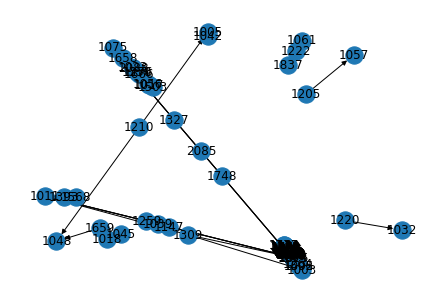

In [6]:

# Step 2: Embed nodes using Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

# Step 3: Cluster nodes to identify sets of dealers doing circular trading
kmeans = KMeans(n_clusters=6, random_state=0)
node_embeddings = [model.wv.get_vector(str(node)) for node in G.nodes()]
clusters = kmeans.fit_predict(node_embeddings)

# Step 4: Print out identified clusters
for i in range(5):
    print(f"Cluster {i}: {[node for node, cluster in zip(G.nodes(), clusters) if cluster == i]}")
    
# Draw the graph of a single cluster
cluster = 1
cluster_nodes = [node for node, cluster in zip(G.nodes(), clusters) if cluster == cluster]
cluster_G = G.subgraph(cluster_nodes)
nx.draw(cluster_G, with_labels=True)
plt.show()

